# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

# Read the Data

In [2]:
df = pd.read_csv('cost_revenue_dirty.csv')
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [ ]:
df.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3411,3224,7/4/2009,1612,"$12,000,000","$5,400,624",$0
315,3201,11/13/1981,The Pursuit of D.B. Cooper,"$12,000,000","$2,104,164","$2,104,164"
3019,2660,11/21/2007,Hitman,"$17,500,000","$99,135,571","$39,687,694"
2428,1751,5/10/2005,Wallace & Gromit: The Curse of the Were-Rabbit,"$30,000,000","$197,593,152","$56,068,547"
1552,439,12/22/2000,Cast Away,"$85,000,000","$427,230,516","$233,632,142"


# Explore and Clean the Data

    How many rows and columns does the dataset contain?

    Are there any NaN values present?

    Are there any duplicate rows?

    What are the data types of the columns?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [5]:
df.shape

(5391, 6)

In [6]:
df.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

- Check if there are missing values

<AxesSubplot:>

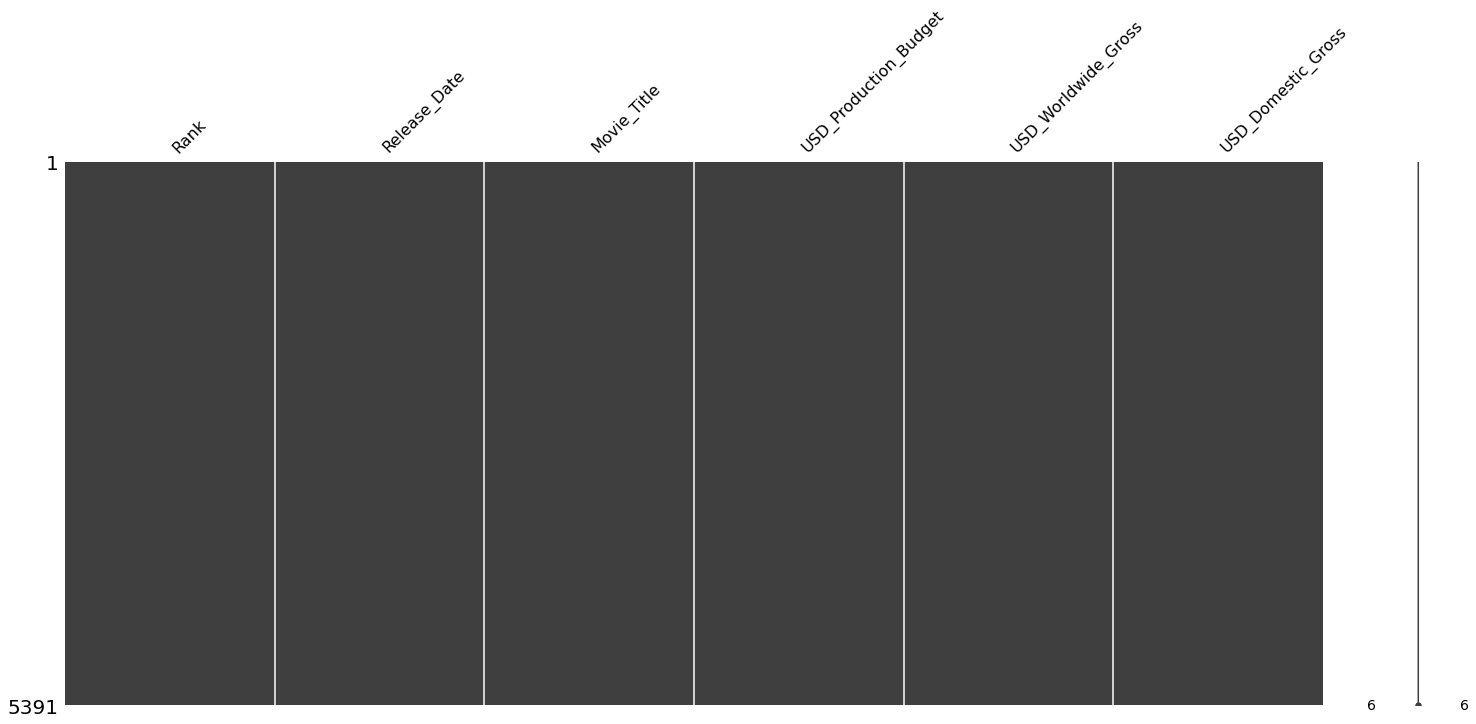

In [7]:
msno.matrix(df)

In [8]:
df.count()

Rank                     5391
Release_Date             5391
Movie_Title              5391
USD_Production_Budget    5391
USD_Worldwide_Gross      5391
USD_Domestic_Gross       5391
dtype: int64

In [9]:
df.isna().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

- Are there duplicates? If Yes, how many?

In [10]:
df.duplicated().sum()

0

In [11]:
df[df.duplicated()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


    Convert the USD_Production_Budget, USD_Worldwide_Gross, and USD_Domestic_Gross columns to a numeric format by removing '$' signs and ','.

    Note that domestic in this context refers to the United States.

In [12]:
df.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2108,877,10/24/2003,Beyond Borders,"$60,000,000","$11,427,090","$4,426,297"
4384,4966,5/4/2013,The Brass Teapot,"$900,000","$413,733","$6,997"
3687,3918,7/16/2010,Standing Ovation,"$5,600,000","$531,806","$531,806"
1564,1791,1/6/2001,What's the Worst That Could Happen?,"$30,000,000","$38,462,071","$32,267,774"
2077,2492,8/22/2003,Marci X,"$20,000,000","$1,646,664","$1,646,664"


- Remove '$', ',' and convert to numeric

In [13]:
# ch = ['$',',']

# for el in ch:
#     if el in first_el:
#         first_el.replace(el,'')
        
# first_el

In [14]:
# def cleaning(text):
#     ch = ['$',',']
#     for el in ch:
#         if el in text:
#              text=text.replace(el,'')
#     return text


In [15]:
for x in ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']:
    #print(df[x])
    l=[]
    for y in df[x]:
        l.append(y.replace('$','').replace(',',''))
        #print(y)
    #print(l)
    l=np.array(l)
    #print(l.shape)
    df[x]=pd.Series(l)

df
    

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


In [16]:
df.head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


- Converting to numeric

In [17]:
df[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']]=df[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


In [19]:
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [20]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


    What is the average production budget of the films in the data set?
    
    What is the average worldwide gross revenue of films?

    What were the minimums for worldwide and domestic revenue?

    Are the bottom 25% of films actually profitable or do they lose money?

    What are the highest production budget and highest worldwide gross revenue of any film?

    How much revenue did the lowest and highest budget films make?

In [22]:
df.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3608,110,2010-03-26,How to Train Your Dragon,165000000,494870991,217581231
4640,3871,2014-07-18,Wish I Was Here,6000000,6591365,3591299
4658,4080,2014-08-18,Henry & Me,5000000,0,0
818,2718,1995-11-12,Sense and Sensibility,16500000,134993774,42993774
240,5153,1978-10-17,Halloween,325000,70000000,47000000


In [23]:
df.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


- Changing output format

In [24]:
# float with two decimal
pd.set_option('display.float_format', '{:.2f}'.format)

In [25]:
df.USD_Production_Budget.mean()

31113737.57837136

In [26]:
df.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.00,5391.00,5391.00,5391.00
mean,2696.00,31113737.58,88855421.96,41235519.44
std,1556.39,40523796.88,168457757.00,66029346.27
min,1.00,1100.00,0.00,0.00
25%,1348.50,5000000.00,3865206.00,1330901.50
50%,2696.00,17000000.00,27450453.00,17192205.00
75%,4043.50,40000000.00,96454455.00,52343687.00
max,5391.00,425000000.00,2783918982.00,936662225.00


    Which film was the lowest budget film in the dataset?

In [27]:
df[df['USD_Production_Budget'] == df['USD_Production_Budget'].min()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


    Which film was the highest budget film in the dataset?

In [28]:
df[df['USD_Production_Budget'] == df['USD_Production_Budget'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


    How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [29]:
df.USD_Domestic_Gross.value_counts()

0            512
8000000        9
7000000        7
2000000        7
10000000       6
            ... 
130444603      1
49823037       1
130178411      1
7578946        1
18653615       1
Name: USD_Domestic_Gross, Length: 4809, dtype: int64

In [30]:
df[df['USD_Domestic_Gross']==0].count()

Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
dtype: int64

In [31]:
df[df['USD_Domestic_Gross']==0].sort_values('USD_Production_Budget', ascending=False).head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


    How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally (i.e., the biggest flops)?

In [32]:
df[df['USD_Worldwide_Gross']==0].count()

Rank                     357
Release_Date             357
Movie_Title              357
USD_Production_Budget    357
USD_Worldwide_Gross      357
USD_Domestic_Gross       357
dtype: int64

In [33]:
df[df['USD_Worldwide_Gross']==0].sort_values('USD_Production_Budget', ascending=False).head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


In [34]:
df[(df['USD_Worldwide_Gross']==0) & (df['USD_Domestic_Gross']==0)].sort_values('USD_Production_Budget', ascending=False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5092,1435,2015-12-31,The Crow,40000000,0,0
3300,1631,2008-12-31,Black Water Transit,35000000,0,0
5045,1656,2015-10-30,Freaks of Nature,33000000,0,0


    Which films made money internationally, but had zero box office revenue in the United States? 

In [35]:
df[(df['USD_Worldwide_Gross']!=0) & (df['USD_Domestic_Gross']==0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [36]:
df[(df['USD_Worldwide_Gross']!=0) & (df['USD_Domestic_Gross']==0)].sort_values('USD_Worldwide_Gross', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
4960,3283,2015-08-05,La famille Bélier,11000000,74056184,0
3809,2154,2010-12-31,Sammy's avonturen: De geheime doorgang,25000000,71594792,0
3769,2776,2010-11-05,Haeundae,16000000,64733391,0
3051,2665,2007-12-31,Taxi 4,17500000,60865364,0
...,...,...,...,...,...,...
5141,4076,2016-02-09,Yoga Hosers,5000000,2199,0
3573,5015,2010-01-26,B-Girl,700000,1160,0
5103,4625,2015-12-31,"To Be Frank, Sinatra at 100",2000000,926,0
4772,5005,2014-12-31,Destiny,750000,450,0


- Alternatively using the query() function

In [37]:
df.query('USD_Worldwide_Gross!=0 and USD_Domestic_Gross==0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


    Identify which films were not released yet as of the time of data collection (May 1st, 2018).

In [38]:
scrape_date = pd.Timestamp('2018-05-01')

In [39]:
df[df['Release_Date']>=scrape_date].count()

Rank                     7
Release_Date             7
Movie_Title              7
USD_Production_Budget    7
USD_Worldwide_Gross      7
USD_Domestic_Gross       7
dtype: int64

In [40]:
df[df['Release_Date']>=scrape_date]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


    Create another DataFrame called data_clean that does not include these films. 

In [41]:
data_clean = df.drop(df[df['Release_Date']>=scrape_date].index)

In [42]:
data_clean.shape

(5384, 6)

In [43]:
assert df.shape > data_clean.shape

    Calculate the percentage of films that did not break even at the box office. We already saw that more than the bottom quartile of movies appears to lose money when we ran .describe(). However, what is the true percentage of films where the costs exceed the worldwide gross revenue? 

In [44]:
data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


In [45]:
round((data_clean.query('USD_Production_Budget > USD_Worldwide_Gross').shape[0]/data_clean.shape[0]) * 100, 2)

37.28